In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from sqlalchemy import create_engine 

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query1 = '''
SELECT DATE_TRUNC('month', creation_date)::date AS month_date,
       SUM(views_count) AS total_views
FROM stackoverflow.posts
GROUP BY DATE_TRUNC('month', creation_date)
ORDER BY SUM(views_count) DESC;
'''
# выполните запрос

In [7]:
sample_df1 = pd.read_sql_query(query1, con=engine)

In [8]:
sample_df1

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


<details>

<summary>Подсказка</summary>
Используйте функцию для усечения даты, а затем сгруппируйте и отсортируйте данные.
</details>

Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

Данные отличаютя по колличеству просмотров по месяцам. Cудя по описанию сайт был создан в августе 2008 года, возможно поэтому в сентяре получилось пик активности , потом часть пользователей  потеряла "начальный" интерес и колличество постепенно стабилизировалось.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [9]:
# напишите запрос
query2 = '''
SELECT u.display_name, 
       COUNT(DISTINCT p.user_id) 
FROM stackoverflow.users AS u
JOIN stackoverflow.posts AS p ON p.user_id = u.id
JOIN stackoverflow.post_types AS pt ON pt.id = p.post_type_id
WHERE  u.creation_date >= p.creation_date - INTERVAL '1 month' AND pt.type = 'Answer'
GROUP BY u.display_name
HAVING COUNT(DISTINCT p.id) > 100
ORDER BY u.display_name;
'''

# выполните запрос

In [10]:
sample_df2 = pd.read_sql_query(query2, con=engine)

In [11]:
sample_df2

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
72,leppie,1
73,lomaxx,1
74,mattlant,1
75,paxdiablo,1


In [12]:
sample_df2.query('count > 1')

,display_name,count
4,Alan,8
7,Brian,15
10,Chris,29
12,Craig,10
14,Dan,21
21,Greg,12
25,Jim,7
26,Joe,9
33,Josh,16
34,Keith,5


# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [13]:
# напишите запрос
query3 = '''
WITH users AS (
               SELECT u.id
               FROM stackoverflow.users AS u
               JOIN stackoverflow.posts AS p ON p.user_id = u.id
               WHERE DATE_TRUNC('month', u.creation_date) = '2008-09-01' AND DATE_TRUNC('month', p.creation_date) = '2008-12-01'
               GROUP BY u.id
               HAVING COUNT(p.id) > 0
)
SELECT COUNT(p.id) AS post_count,
       DATE_TRUNC('month', p.creation_date)::date AS month
FROM stackoverflow.posts AS p
WHERE p.user_id IN (SELECT id FROM users) AND DATE_TRUNC('year', p.creation_date) :: date = '2008-01-01' 
GROUP BY month
ORDER BY month DESC;
'''

# выполните запрос

In [14]:
sample_df3 = pd.read_sql_query(query3, con=engine)

In [15]:
sample_df3

,post_count,month
0,17641,2008-12-01
1,18294,2008-11-01
2,27171,2008-10-01
3,24870,2008-09-01
4,32,2008-08-01


# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [16]:
# напишите запрос
query4 = '''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM stackoverflow.posts
ORDER BY user_id     
'''

# выполните запрос

In [17]:
sample_df4 = pd.read_sql_query(query4, con=engine)

In [18]:
sample_df4

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [19]:
# напишите запрос
query5= '''
WITH active_users AS (
  SELECT user_id
  FROM (
    SELECT user_id, 
           COUNT(DISTINCT DATE_TRUNC('day', creation_date)) AS post_days
    FROM stackoverflow.posts
    WHERE DATE_TRUNC('month', creation_date) :: date = '2008-08-01' 
    GROUP BY user_id
    HAVING COUNT(id) > 120
  ) AS subquery
)
SELECT user_id, AVG(daily_count) AS avg_daily
FROM (
  SELECT user_id, DATE_TRUNC('day', creation_date) AS post_day, COUNT(id) AS daily_count
  FROM stackoverflow.posts
  WHERE DATE_TRUNC('month', creation_date) :: date = '2008-08-01' 
  GROUP BY user_id, DATE_TRUNC('day', creation_date)
) AS user_counts
WHERE user_id IN (SELECT user_id FROM active_users)
GROUP BY user_id
ORDER BY avg_daily;
'''

# выполните запрос

In [20]:
sample_df5 = pd.read_sql_query(query5, con=engine)

In [21]:
sample_df5

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [22]:
# напишите запрос
query6 = '''
SELECT CAST(ROUND(AVG(count), 0) AS INTEGER) AS result
FROM (
  SELECT COUNT(DISTINCT DATE_TRUNC('day', creation_date)::date) AS count
  FROM stackoverflow.posts
  WHERE DATE_TRUNC('day', creation_date)::date BETWEEN '2008-12-01' AND '2008-12-07'
  GROUP BY user_id
  HAVING COUNT(id) > 0
) AS active_days;
'''

# выполните запрос

In [23]:
sample_df6 = pd.read_sql_query(query6, con=engine)

In [24]:
sample_df6

,result
0,2


# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [25]:
# напишите запрос
query7 = '''
WITH df AS (
  SELECT user_id,
         creation_date,
         LAG(creation_date, 2) OVER (PARTITION BY user_id ORDER BY creation_date)::date AS prev_post_date
  FROM stackoverflow.posts
  ORDER BY user_id, creation_date
)
SELECT user_id,
       creation_date,
       TO_CHAR(prev_post_date, 'Month') AS prev_month
FROM df;
'''

# выполните запрос

In [26]:
sample_df7 = pd.read_sql_query(query7, con=engine)

In [27]:
sample_df7

,user_id,creation_date,prev_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [28]:
# напишите запрос
query8 = '''
WITH cohort AS (
  SELECT DISTINCT user_id,
  FIRST_VALUE(DATE_TRUNC('month', creation_date)) OVER (PARTITION BY user_id ORDER BY DATE_TRUNC('month', creation_date)) AS cohort_dt
  FROM stackoverflow.posts
),
cohort_users AS (
  SELECT cohort_dt, 
  COUNT(DISTINCT user_id) AS cohort_users_cnt
  FROM cohort
  GROUP BY cohort_dt
),
sessions AS (
  SELECT user_id, 
  DATE_TRUNC('month', creation_date) AS session_date
  FROM stackoverflow.posts
  GROUP BY user_id, DATE_TRUNC('month', creation_date)
)
SELECT 
  c.cohort_dt,
  s.session_date,
  COUNT(c.user_id) AS users_cnt,
  cu.cohort_users_cnt,
  ROUND(COUNT(c.user_id) * 100.0 / cu.cohort_users_cnt, 2) AS retention_rate
FROM 
  cohort c
  JOIN sessions s ON c.user_id = s.user_id
  JOIN cohort_users cu ON c.cohort_dt = cu.cohort_dt
GROUP BY 
  c.cohort_dt, 
  s.session_date, 
  cu.cohort_users_cnt
ORDER BY 
  c.cohort_dt, 
  s.session_date;
'''

# выполните запрос

In [29]:
sample_df8 = pd.read_sql_query(query8, con=engine)

In [30]:
sample_df8

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


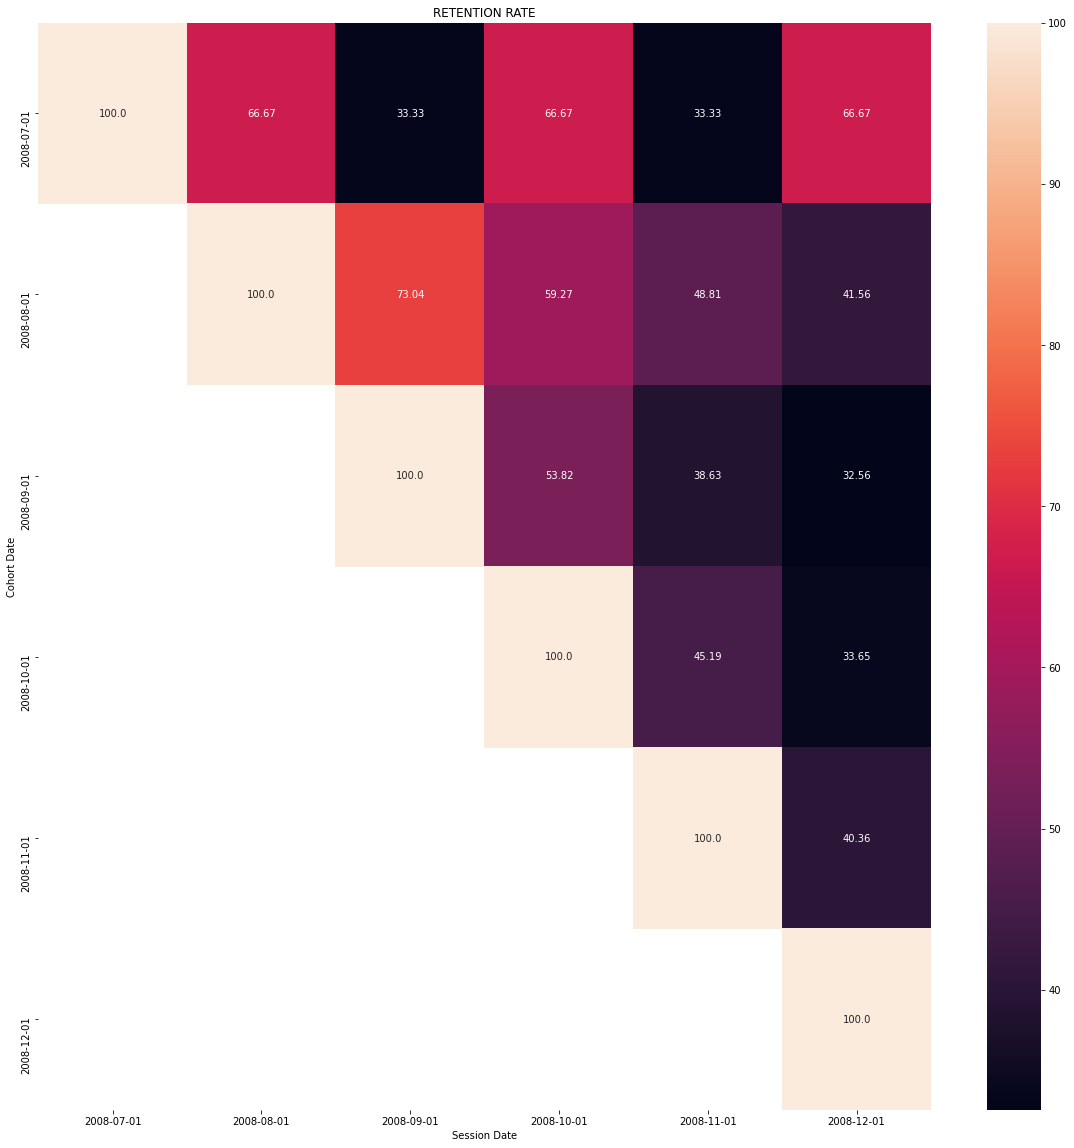

In [31]:
rrt = sample_df8.pivot('cohort_dt', 'session_date', 'retention_rate')
rrt.index = [str(x)[0:10] for x in rrt.index]
rrt.columns = [str(x)[0:10] for x in rrt.columns]
plt.figure(figsize=(20, 20)) 
sns.heatmap(rrt, annot=True, fmt='') 
plt.title('RETENTION RATE') 
plt.xlabel('Session Date')
plt.ylabel('Cohort Date')
plt.show() 

Первый месяц работы удержание имеет странные колебания прироста и оттока 66-33... похоже на тестовый период. 
Далее все логично. От когорты к когорте удержание плавно падает. Думаю это стандартный сценарий для новых проектов в начальный период

По информации которую нашел сатй был запущен в августе т.е июльская когорта как я думаю была тестовой. Отсюда такие большие перепады, скорее связанные с техническими моментами. Август - первый месяц запуска сайта, пользователям многое интересно, сайт еще не "исследован" полностью. Далее уже постепенное падение.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [32]:
# напишите запрос
query9 = '''
WITH monthly_posts AS (
  SELECT 
    CAST(EXTRACT(MONTH FROM creation_date)AS INTEGER) AS creation_month,
    COUNT(*) AS posts_count
  FROM 
    stackoverflow.posts
  WHERE 
    DATE_TRUNC('month', creation_date):: date >= '2008-09-01' AND DATE_TRUNC('month', creation_date):: date <= '2008-12-31'
  GROUP BY 
    EXTRACT(MONTH FROM creation_date)
),
percentage_change AS (
  SELECT 
    creation_month,
    posts_count,
    (posts_count - LAG(posts_count, 1) OVER (ORDER BY creation_month)) * 100.0 / LAG(posts_count, 1) OVER (ORDER BY creation_month) AS percentage
  FROM 
    monthly_posts
)
SELECT 
  creation_month,
  posts_count,
  ROUND(percentage, 2) AS percentage
FROM 
  percentage_change;
'''

# выполните запрос

In [33]:
sample_df9 = pd.read_sql_query(query9, con=engine)

In [34]:
sample_df9

,creation_month,posts_count,percentage
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


<details>

<summary>Подсказка</summary>
Эту задачу стоит декомпозировать. Сформируйте запрос, который отобразит номер месяца и количество постов. Затем можно использовать оконную функцию, которая вернёт значение за предыдущий месяц, и посчитать процент.
</details>

Постройте круговую диаграмму с количеством постов по месяцам.

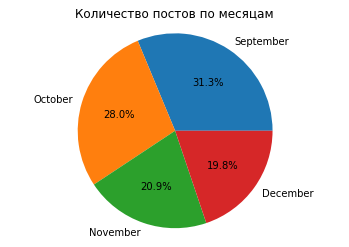

In [35]:
months = sample_df9['creation_month']
posts_count = sample_df9['posts_count']

month_names = [calendar.month_name[month] for month in months]

plt.pie(posts_count, labels=month_names, autopct='%1.1f%%')
plt.title('Количество постов по месяцам')
plt.axis('equal')  

plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [36]:
# напишите запрос
query10 = '''
WITH top_user AS (
  SELECT user_id
  FROM stackoverflow.posts
  GROUP BY user_id
  ORDER BY COUNT(*) DESC
  LIMIT 1
), october_activity AS (
  SELECT
    DATE_TRUNC('week', p.creation_date) AS week_creation,
    MAX(p.creation_date) AS creation_date
  FROM stackoverflow.posts p
  WHERE
    DATE_TRUNC('month', p.creation_date):: date = '2008-10-01'
    AND p.user_id = (SELECT user_id FROM top_user)
  GROUP BY week_creation
)
SELECT
  CAST(EXTRACT(WEEK FROM o.week_creation) AS INTEGER) AS week_creation,
  o.creation_date
FROM october_activity o
ORDER BY week_creation

'''

# выполните запрос

In [37]:
sample_df10 = pd.read_sql_query(query10, con=engine)

In [38]:
sample_df10

,week_creation,creation_date
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01
